<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Ответ:` указанный сид обеспечивает воспроизводимость результатов. То есть задание сида гарантирует, что при прогоне ноутбука например ассистентом, в ячейках будут те же данные/графики/и тп, что были у меня 

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2598]:
import pandas as pd

In [2599]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

#### 30 случайных строк

In [2602]:
# Ваш код здесь
df_train.sample(30)  # 30 случайных строк в датасете

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

#### Первые и последние 5 строк

In [2604]:
df_test.head(5)  # первые 5 строк датасета

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [2605]:
df_test.tail(5)  # последние 5 строк датасета

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

#### Пропуски

Для поиска пропусков воспользуемся `df.info()`. В колонке Non-Null Count будет кол-во непустых значений, и если это число == числу строк в датафрейме, тогда пропусков нет. Иначе, пропуски есть

In [2608]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Всего строк: 6999, а пропуски наблюдаются в колонках `mileage`, `engine`, `max_power`, `torque`, `seats`

Аналогично для тестового датасета:

In [2611]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


Видим тот же набор колонок с пропусками: `mileage`, `engine`, `max_power`, `torque`, `seats`

#### Явные дубликаты

In [2614]:
any(df_train.duplicated())  # есть ли в данных явные дубликаты - ищем наличие хотя бы одного True

True

In [2615]:
any(df_test.duplicated())  # аналогично в тестовом датасете

True

#### Вопросы

**Вопрос 1**
>Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Используя любой из указанных наборов строчек, можно определить формат данных, например. Концептуально понять, с какой сущностью мы вообще работаем, какие колонки что обозначают, какие данные и форматы содержатся в каждой колонке. Один из удобных кейсов - можно сразу понять, в каких единицах измерения содержатся данные в определенной колонке, насколько она может быть захломлена мусором (например, html тегами, спец символами и тп). На наших данных, например, видим в mileage следом за числом ед измерения - kmpl, поэтому мы сразу понимаем, что с этой колонкой не получится работать как с числом без предварительной обработки.

Также можно сделать первичные выводы о распределении значений внутри всего датасета на основе случайного набора строчек. Например, видим видим в основном значения 5.0 и 7.0 в колонке `seats` (что в принципе логично). Однако с другой стороны, это может нам навредить, и случайный набор маленького размера может дать неверное представление о данных, поэтому в любом случае за распределениями и стат данными нужно идти к другим методам. 

Аналогично с дубликатами - может повезти, и мы можем их увидеть сразу на сэмпле, но даже на нашем сэмпле в 30 строк уже сложно сверять строчки между собой. Поэтому например при поиске дублей чаще всего нельзя делать выводы на основе случайных/верхних/нижних строк. 
Аналогично с пустыми значениями - может повезти, и заметим пустые, а можем и не попасть на них. Поэтому в общем случае про пустые значения тоже не получится сделать выводы на основе случайных/верхних/нижних строк.

**Вопрос 2**
>Достаточно ли метода duplicated для анализа дубликатов? Почему?

Метод `duplicated()` ищет явные дубликаты, то есть полное совпадение строк. Так что с явными дубликатами он справляется, и если мы хотим отсечь их, то ищем их с помощью `duplicated()` и избавляемся через `drop_duplicates()`. Однако часто бывают частичные дубликаты: например, строка может совпадать во всех колонках, кроме одной. Примеры, которые приходят в голову - все колонки в 2 строках совпадают, кроме одной - в 1 строки эта колонка null, в другой - значение, эти колонки не будут считаться дубликатами через `duplicated()`. Другой пример - технические поля. Например, DWH собирает колонки версионирования по типу `valid_from_dttm`, и дублирующие записи могут быть загружены в разное время, так что эта колонка будет отличаться, а все остальные поля (относящиеся к логике сущности) - будут идентичны. Такой случай тоже не будем считать дубликатом при использовании `duplicated()`


#### дашборд

In [2619]:
!pip install ydata-profiling

In [2620]:
# код ниже взял из доки

from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")

In [2621]:
profile.to_notebook_iframe()  # для корректного отображения в юпитере

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████| 13/13 [00:00<00:00, 1638.55it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [2623]:
df_train.info()  # вспомним, в каких колонках есть пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Для заполнения пропусков медианами необходимо выполнить предобработку, так как в большинстве колонок данные не интовые.

In [2625]:
df_train.head(2)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   

                torque  seats  
0       190Nm@ 2000rpm    5.0  
1  250Nm@ 1500-2500rpm    5.0

Далее для каждой колонки проверим, какие единицы измерения есть 

`mileage`:

In [2627]:
df_train['mileage'].str.split(' ').str[1].drop_duplicates()

0      kmpl
5     km/kg
12      NaN
Name: mileage, dtype: object

kmpl и km/kg про одно и то же, но для разных движков. Можем сплитить по пробелу 

In [2629]:
df_train['mileage'] = df_train.mileage.str.split(' ').str[0]

`engine`:

In [2631]:
df_train['engine'].str.split(' ').str[1].drop_duplicates()

0      CC
12    NaN
Name: engine, dtype: object

только одна ед. измерения, все ок

In [2633]:
df_train['engine'] = df_train.engine.str.split(' ').str[0]

In [2634]:
df_train['max_power'].str.split(' ').str[1].drop_duplicates()

0     bhp
12    NaN
Name: max_power, dtype: object

только одна ед. измерения, все ок

In [2636]:
df_train['max_power'] = df_train.max_power.str.split(' ').str[0]

в `max_power` в строчке с индексом 4217 содержится пустая строка в max_power, так как он изначально не указан, учтем это:

In [2638]:
df_train.loc[4217, 'max_power'] = np.nan

с крутящим моментом (`torque`) все сложнее. Я нашел 2 основных паттерна глазками:

- `260 Nm at 1800-2200 rpm`
- `21.4@ 1,900(kgm@ rpm)`

При этом сам крутящий момент измеряется либо в Nm либо в kgm (в данном датасете)

Обработаем отдельно 2 эти случая и посмотрим, хватит ли их для покрытия всех пропусков. Дополнительно замечу, что Нм != кгм. Нейронка сказала, что они переводятся по соотношению `кг·м × 9.80665 = Н·м` - используем его, чтобы все преобразовать к нм. Дополнительно для этого, будем определять, содежится ли нм или кгм в строке, чтобы понимать, какая это единица измерения

In [2640]:
def extract_torque_value(text):
    if pd.isna(text):  # обработка NaN
        return np.nan

    text = text.lower()

    # кейс 1 
    pattern1 = r'(\d+\.?\d*)\s*(nm|kgm|)\b'
    
    # кейс 2
    pattern2 = r'(\d+\.?\d*)\s*[@]'
    
    # тестим первый кейс
    match1 = re.search(pattern1, text)
    if match1:
        return float(match1.group(1))
    
    # если не первый кейс, то тестим второй
    match2 = re.search(pattern2, text)
    if match2:
        return float(match2.group(1))
    
    return np.nan


def extract_torque_unit(text):
    if pd.isna(text):  # обработка NaN
        return np.nan
    
    text = text.lower()
    
    if 'kgm' in text:  # определяем, что есть в строке - kgm или nm, так вытаскиваем ед измерения
        return 'kgm'
    if 'nm' in text:
        return 'nm'

    return np.nan

# Применяем функции к колонке датафрейма
df_train['torque_value'] = df_train['torque'].apply(extract_torque_value)
df_train['torque_unit'] = df_train['torque'].apply(extract_torque_unit)

In [2641]:
# сравним кол-во пустых значений в новых колонках с исходной torque чтобы убедиться, что логика покрыла все случаи
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6802 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
 13  torque_value   6796 non-null   float64
 14  torque_unit    6785 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 820.3+ KB


Видим, что torque_unit не учел 11 кейсов, взглянем на них:

In [2643]:
df_train[(pd.isna(df_train.torque_unit)) & (~pd.isna(df_train.torque))]

name  year  selling_price  km_driven  \
125            Skoda Superb LK 1.8 TSI AT  2018        1864999      50000   
1437  Mercedes-Benz M-Class ML 350 4Matic  2011        1700000     110000   
2794           Skoda Superb LK 1.8 TSI AT  2018        1864999      50000   
3738     Skoda Octavia Classic 1.9 TDI MT  2006         280000     150000   
3866  Mercedes-Benz M-Class ML 350 4Matic  2011        1700000     110000   
4770     Skoda Octavia Classic 1.9 TDI MT  2007         300000     155000   
4952    Skoda Octavia Ambiente 1.9 TDI MT  2007         110000     120000   
5515    Skoda Octavia Ambiente 1.9 TDI MT  2003         100000     250000   
6154       Skoda Octavia Rider 1.9 AT TDI  2008         210000     120000   
6281       Skoda Octavia Ambiente 1.9 TDI  2010         355000     116000   
6490    Skoda Octavia Ambiente 1.9 TDI MT  2007         195000     175000   

        fuel seller_type transmission         owner mileage engine max_power  \
125   Petrol      Dealer    Automatic   First Owner   14.67   1798    177.46   
1437  Diesel  Individual    Automatic   Third Owner     0.0   2987       165   
2794  Petrol      Dealer    Automatic   First Owner   14.67   1798    177.46   
3738  Diesel  Individual       Manual   Third Owner    18.7   1896        66   
3866  Diesel  Individual    Automatic   Third Owner     0.0   2987       165   
4770  Diesel  Individual       Manual   First Owner    18.7   1896        66   
4952  Diesel  Individual       Manual  Second Owner    18.7   1896        66   
5515  Diesel  Individual       Manual  Second Owner    18.7   1896        66   
6154  Diesel  Individual       Manual  Second Owner    18.7   1896        66   
6281  Diesel  Individual       Manual   First Owner    18.7   1896        66   
6490  Diesel  Individual       Manual  Second Owner    18.7   1896        66   

                 torque  seats  torque_value torque_unit  
125   250@ 1250-5000rpm    5.0         250.0         NaN  
1437     510@ 1600-2400    5.0         510.0         NaN  
2794  250@ 1250-5000rpm    5.0         250.0         NaN  
3738         210 / 1900    5.0         210.0         NaN  
3866     510@ 1600-2400    5.0         510.0         NaN  
4770         210 / 1900    5.0         210.0         NaN  
4952         210 / 1900    5.0         210.0         NaN  
5515         210 / 1900    5.0         210.0         NaN  
6154         210 / 1900    5.0         210.0         NaN  
6281         210 / 1900    5.0         210.0         NaN  
6490         210 / 1900    5.0         210.0         NaN

погуглив, я понял, что для этих записей такое значение может измеряться тока в Нм

In [2645]:
df_train.loc[(pd.isna(df_train.torque_unit)) & (~pd.isna(df_train.torque)), 'torque_unit'] = 'nm'

In [2646]:
# повтоорная проверка 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6802 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
 13  torque_value   6796 non-null   float64
 14  torque_unit    6796 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 820.3+ KB


и переведем кгм в нм

In [2648]:
df_train.loc[df_train.torque_unit == 'kgm', 'torque_value'] = df_train.torque_value * 9.80665

теперь дропнем созданные дополнительные колонки, и перезапишем обработанное значение в исходную колонку `torque`

In [2650]:
df_train['torque'] = df_train['torque_value']
df_train.drop(columns=['torque_value', 'torque_unit'], inplace=True)

Теперь преобразуем к числовому типу данных и посчитаем медианы только по тренировочному датасету, как это указано в задании

In [2652]:
df_train['mileage'] = df_train['mileage'].astype(float)
df_train['engine'] = df_train['engine'].astype(float)
df_train['max_power'] = df_train['max_power'].astype(float)

In [2653]:
# считаем медианы по тренировочному датасету по условию в задании
medians_d = {
    'mileage_median': df_train['mileage'].median(),
    'engine_median': df_train['engine'].median(),
    'max_power_median': df_train['max_power'].median(),
    'torque_median': df_train['torque'].median(),
    'seats_median': df_train['seats'].median(),
    
}

И теперь заполняем пропуски для тренировочного датасета:

In [2655]:
columns = ['mileage', 'engine', 'max_power', 'torque', 'seats']

for col in columns:
    df_train.loc[pd.isna(df_train[col]), col] = medians_d[f'{col}_median']

In [2656]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6999 non-null   float64
 9   engine         6999 non-null   float64
 10  max_power      6999 non-null   float64
 11  torque         6999 non-null   float64
 12  seats          6999 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 711.0+ KB


отлично, пропусков не осталось. Теперь сделаем все то же самое для тестового датасета:

In [2658]:
df_test.info()  # изначально пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [2659]:
df_test['mileage'].str.split(' ').str[1].drop_duplicates()

0      kmpl
34      NaN
44    km/kg
Name: mileage, dtype: object

kmpl и km/kg про одно и то же, но для разных движков. Можем сплитить по пробелу 

In [2661]:
df_test['mileage'] = df_test.mileage.str.split(' ').str[0]

`engine`:

In [2663]:
df_test['engine'].str.split(' ').str[1].drop_duplicates()

0      CC
34    NaN
Name: engine, dtype: object

только одна ед. измерения, все ок

In [2665]:
df_test['engine'] = df_test.engine.str.split(' ').str[0]

In [2666]:
df_test['max_power'].str.split(' ').str[1].drop_duplicates()

0     bhp
34    NaN
Name: max_power, dtype: object

только одна ед. измерения, все ок

In [2668]:
df_test['max_power'] = df_test.max_power.str.split(' ').str[0]

In [2669]:
# Применяем функции к колонке датафрейма
df_test['torque_value'] = df_test['torque'].apply(extract_torque_value)
df_test['torque_unit'] = df_test['torque'].apply(extract_torque_unit)

In [2670]:
# сравним кол-во пустых значений в новых колонках с исходной torque чтобы убедиться, что логика покрыла все случаи
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
 13  torque_value   981 non-null    float64
 14  torque_unit    980 non-null    object 
dtypes: float64(2), int64(3), object(10)
memory usage: 117.3+ KB


Видим, что torque_unit не учел 1 кейс, взглянем на него:

In [2672]:
df_test[(pd.isna(df_test.torque_unit)) & (~pd.isna(df_test.torque))]

name  year  selling_price  km_driven    fuel  \
793  Honda Jazz Select Edition Active  2011         350000      80000  Petrol   

    seller_type transmission         owner mileage engine max_power  \
793  Individual       Manual  Second Owner    16.0   1198        90   

              torque  seats  torque_value torque_unit  
793  110(11.2)@ 4800    5.0         110.0         NaN

для этой записи так же оставим нм

In [2674]:
df_test.loc[(pd.isna(df_test.torque_unit)) & (~pd.isna(df_test.torque)), 'torque_unit'] = 'nm'

In [2675]:
# повтоорная проверка 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
 13  torque_value   981 non-null    float64
 14  torque_unit    981 non-null    object 
dtypes: float64(2), int64(3), object(10)
memory usage: 117.3+ KB


и переведем кгм в нм

In [2677]:
df_test.loc[df_test.torque_unit == 'kgm', 'torque_value'] = df_test.torque_value * 9.80665

теперь дропнем созданные дополнительные колонки, и перезапишем обработанное значение в исходную колонку `torque`

In [2679]:
df_test['torque'] = df_test['torque_value']
df_test.drop(columns=['torque_value', 'torque_unit'], inplace=True)

Теперь преобразуем к числовому типу данных и посчитаем медианы только по тренировочному датасету, как это указано в задании

In [2681]:
df_test['mileage'] = df_test['mileage'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)
df_test['max_power'] = df_test['max_power'].astype(float)

И теперь заполняем пропуски для тренировочного датасета:

In [2683]:
columns = ['mileage', 'engine', 'max_power', 'torque', 'seats']

for col in columns:
    df_test.loc[pd.isna(df_test[col]), col] = medians_d[f'{col}_median']

In [2684]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   float64
 10  max_power      1000 non-null   float64
 11  torque         1000 non-null   float64
 12  seats          1000 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 101.7+ KB


все пропуски заполнены

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


В нашем случае стоимость автомобиля - это целевая переменная

In [2688]:
# объекты с трейне с одинаковым признаковым описанием
sum(df_train.drop(columns=['selling_price']).duplicated(keep=False))  # параметр keep=False чтобы выводить в том числе сами строки, для которых найдены дубли

1799

Таких объектов 1799 (всех дублирующихся), отобразим их:

In [2690]:
df_train[df_train.drop(columns=['selling_price']).duplicated(keep=False)]

name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
22        45000  Petrol  Individual       Manual   First Owner    21.40   
26        25000  Petrol  Individual       Manual   First Owner    16.80   
27        70000  Diesel  Individual       Manual   First Owner    24.30   
28        50000  Petrol  Individual       Manual  Second Owner    19.30   
29        35000  Petrol  Individual       Manual  Second Owner    14.00   
...         ...     ...         ...          ...           ...      ...   
6981      24000  Diesel  Individual       Manual   First Owner    24.40   
6984      24000  Diesel  Individual       Manual   First Owner    24.40   
6989      50000  Diesel  Individual       Manual   First Owner    26.59   
6997      25000  Diesel  Individual       Manual   First Owner    23.57   
6998      25000  Diesel  Individual       Manual   First Owner    23.57   

      engine  max_power      torque  seats  
22    1197.0      83.10  115.000000    5.0  
26     796.0      34.20   59.000000    8.0  
27    1248.0      88.50  200.000000    5.0  
28    1248.0      82.00  170.000000    5.0  
29     796.0      35.00   59.820565    5.0  
...      ...        ...         ...    ...  
6981  1498.0      98.63  215.000000    5.0  
6984  1498.0      98.63  215.000000    5.0  
6989  1248.0      74.00  190.000000    5.0  
6997  1396.0      70.00  140.000000    5.0  
6998  1396.0      70.00  140.000000    5.0  

[1799 rows x 13 columns]

In [2691]:
# удалим дубликаты по признакам и оставим первые строки (keep = 'first')
df_train = df_train.drop_duplicates(subset=[col for col in df_train.columns if col != 'selling_price'], keep='first')

In [2692]:
# обновим индексы
df_train = df_train.reset_index(drop=True)

В задании этого не сказано, но на тесте тоже удалим дубликаты, потому что предполагается, что мы обрабатываем исходный набор данных для обучения, а затем делим его на трейн и тест, так что изменений должны быть консистентны

In [2694]:
# объекты в тесте с одинаковым признаковым описанием
sum(df_test.drop(columns=['selling_price']).duplicated(keep=False))  # параметр keep=False чтобы выводить в том числе сами строки, для которых найдены дубли

109

In [2695]:
# удалим дубликаты по признакам и оставим первые строки (keep = 'first')
df_test = df_test.drop_duplicates(subset=[col for col in df_test.columns if col != 'selling_price'], keep='first')
df_test = df_test.reset_index(drop=True)

In [2696]:
len(df_test)  # удалили дубликаты

931

In [2697]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

Все необходимые предобработки я уже сделал в рамках заполнения пропусков на основе медиан. Убедимся в этом:

In [2700]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
dtype: object

In [2701]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
dtype: object

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [2703]:
# сделаем нужные касты
cols_to_int = ['engine', 'seats']

for col in cols_to_int:
    df_train[col] = df_train[col].astype(int)
    df_test[col] = df_test[col].astype(int)

In [2704]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
torque           float64
seats              int64
dtype: object

In [2705]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
torque           float64
seats              int64
dtype: object

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [2707]:
# статистики по числовым столбцам
df_train.describe(include='number')

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  
count  5840.000000  5840.000000  5840.000000  
mean     87.910782   176.250684     5.426712  
std      31.639585   116.727183     0.982344  
min       0.000000    47.071920     2.000000  
25%      68.000000   111.800000     5.000000  
50%      81.860000   170.000000     5.000000  
75%      99.000000   200.055660     5.000000  
max     400.000000  3726.527000    14.000000

In [2708]:
# статистики по числовым столбцам
df_test.describe(include='number')

year  selling_price      km_driven     mileage       engine  \
count   931.000000   9.310000e+02     931.000000  931.000000   931.000000   
mean   2013.506982   5.501182e+05   72786.747583   19.377852  1435.484425   
std       4.043408   5.987156e+05   48823.924040    3.994502   515.908793   
min    1995.000000   3.100000e+04    1303.000000    0.000000   624.000000   
25%    2011.000000   2.500000e+05   39000.000000   16.500000  1196.500000   
50%    2014.000000   4.200000e+05   65000.000000   19.330000  1248.000000   
75%    2017.000000   6.500000e+05  100000.000000   22.320000  1498.000000   
max    2020.000000   6.000000e+06  375000.000000   32.260000  3604.000000   

        max_power       torque       seats  
count  931.000000   931.000000  931.000000  
mean    88.564694   173.920653    5.409237  
std     32.715274   101.196863    0.924622  
min     34.200000    48.000000    4.000000  
25%     68.050000   110.000000    5.000000  
50%     82.000000   170.000000    5.000000  
75%    100.000000   204.000000    5.000000  
max    280.000000  1421.964250    9.000000

In [2709]:
# статистики по категориальным столбцам
df_train.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [2710]:
# статистики по категориальным столбцам
df_test.describe(include='object')

name    fuel seller_type transmission        owner
count                   931     931         931          931          931
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     14     498         813          839          562

In [2711]:
assert df_train.shape == (5840, 13)

**Выводы:**

Честно говоря, прям вау-выводы сложно делать только на этих таблицах, но выделим основные закономерности (подсвечиваю все на основе трейна, в тесте тенденции похожи)
1. в датасете участвуют довольно старые машины, так как в среднем год их выпуска - 2013, а самая "актуальная" машина - 2020 года
2. Между самой дорогой машиной (10млн) и самой дешевой (30К) очень большая разница
3. Большинство машин - 5-местные (75 перцентиль = 5), при этом есть большие машины с вместимостью 14 мест
4. Подавляющее большинство продацов - Individual (5223 и 5840)
5. КПП в большинстве машин ручная (5336 из 5840), это подтверждает, что данные староваты (сейчас гораздо больше машин на автомате)
6. Еще замечу, что в mileage есть 0 и max_power = 0 (они в исходном датасете = 0). Подозреваю, что эти записи означают, что информации просто нет, но не будем менять эти значения, так как в заданиях об этом не сказано

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

Введем магическую команду чтобы пофиксить отображение графиков в юпитере

In [2717]:
%matplotlib inline

In [2718]:
# your code here
sns.pairplot(df_train)

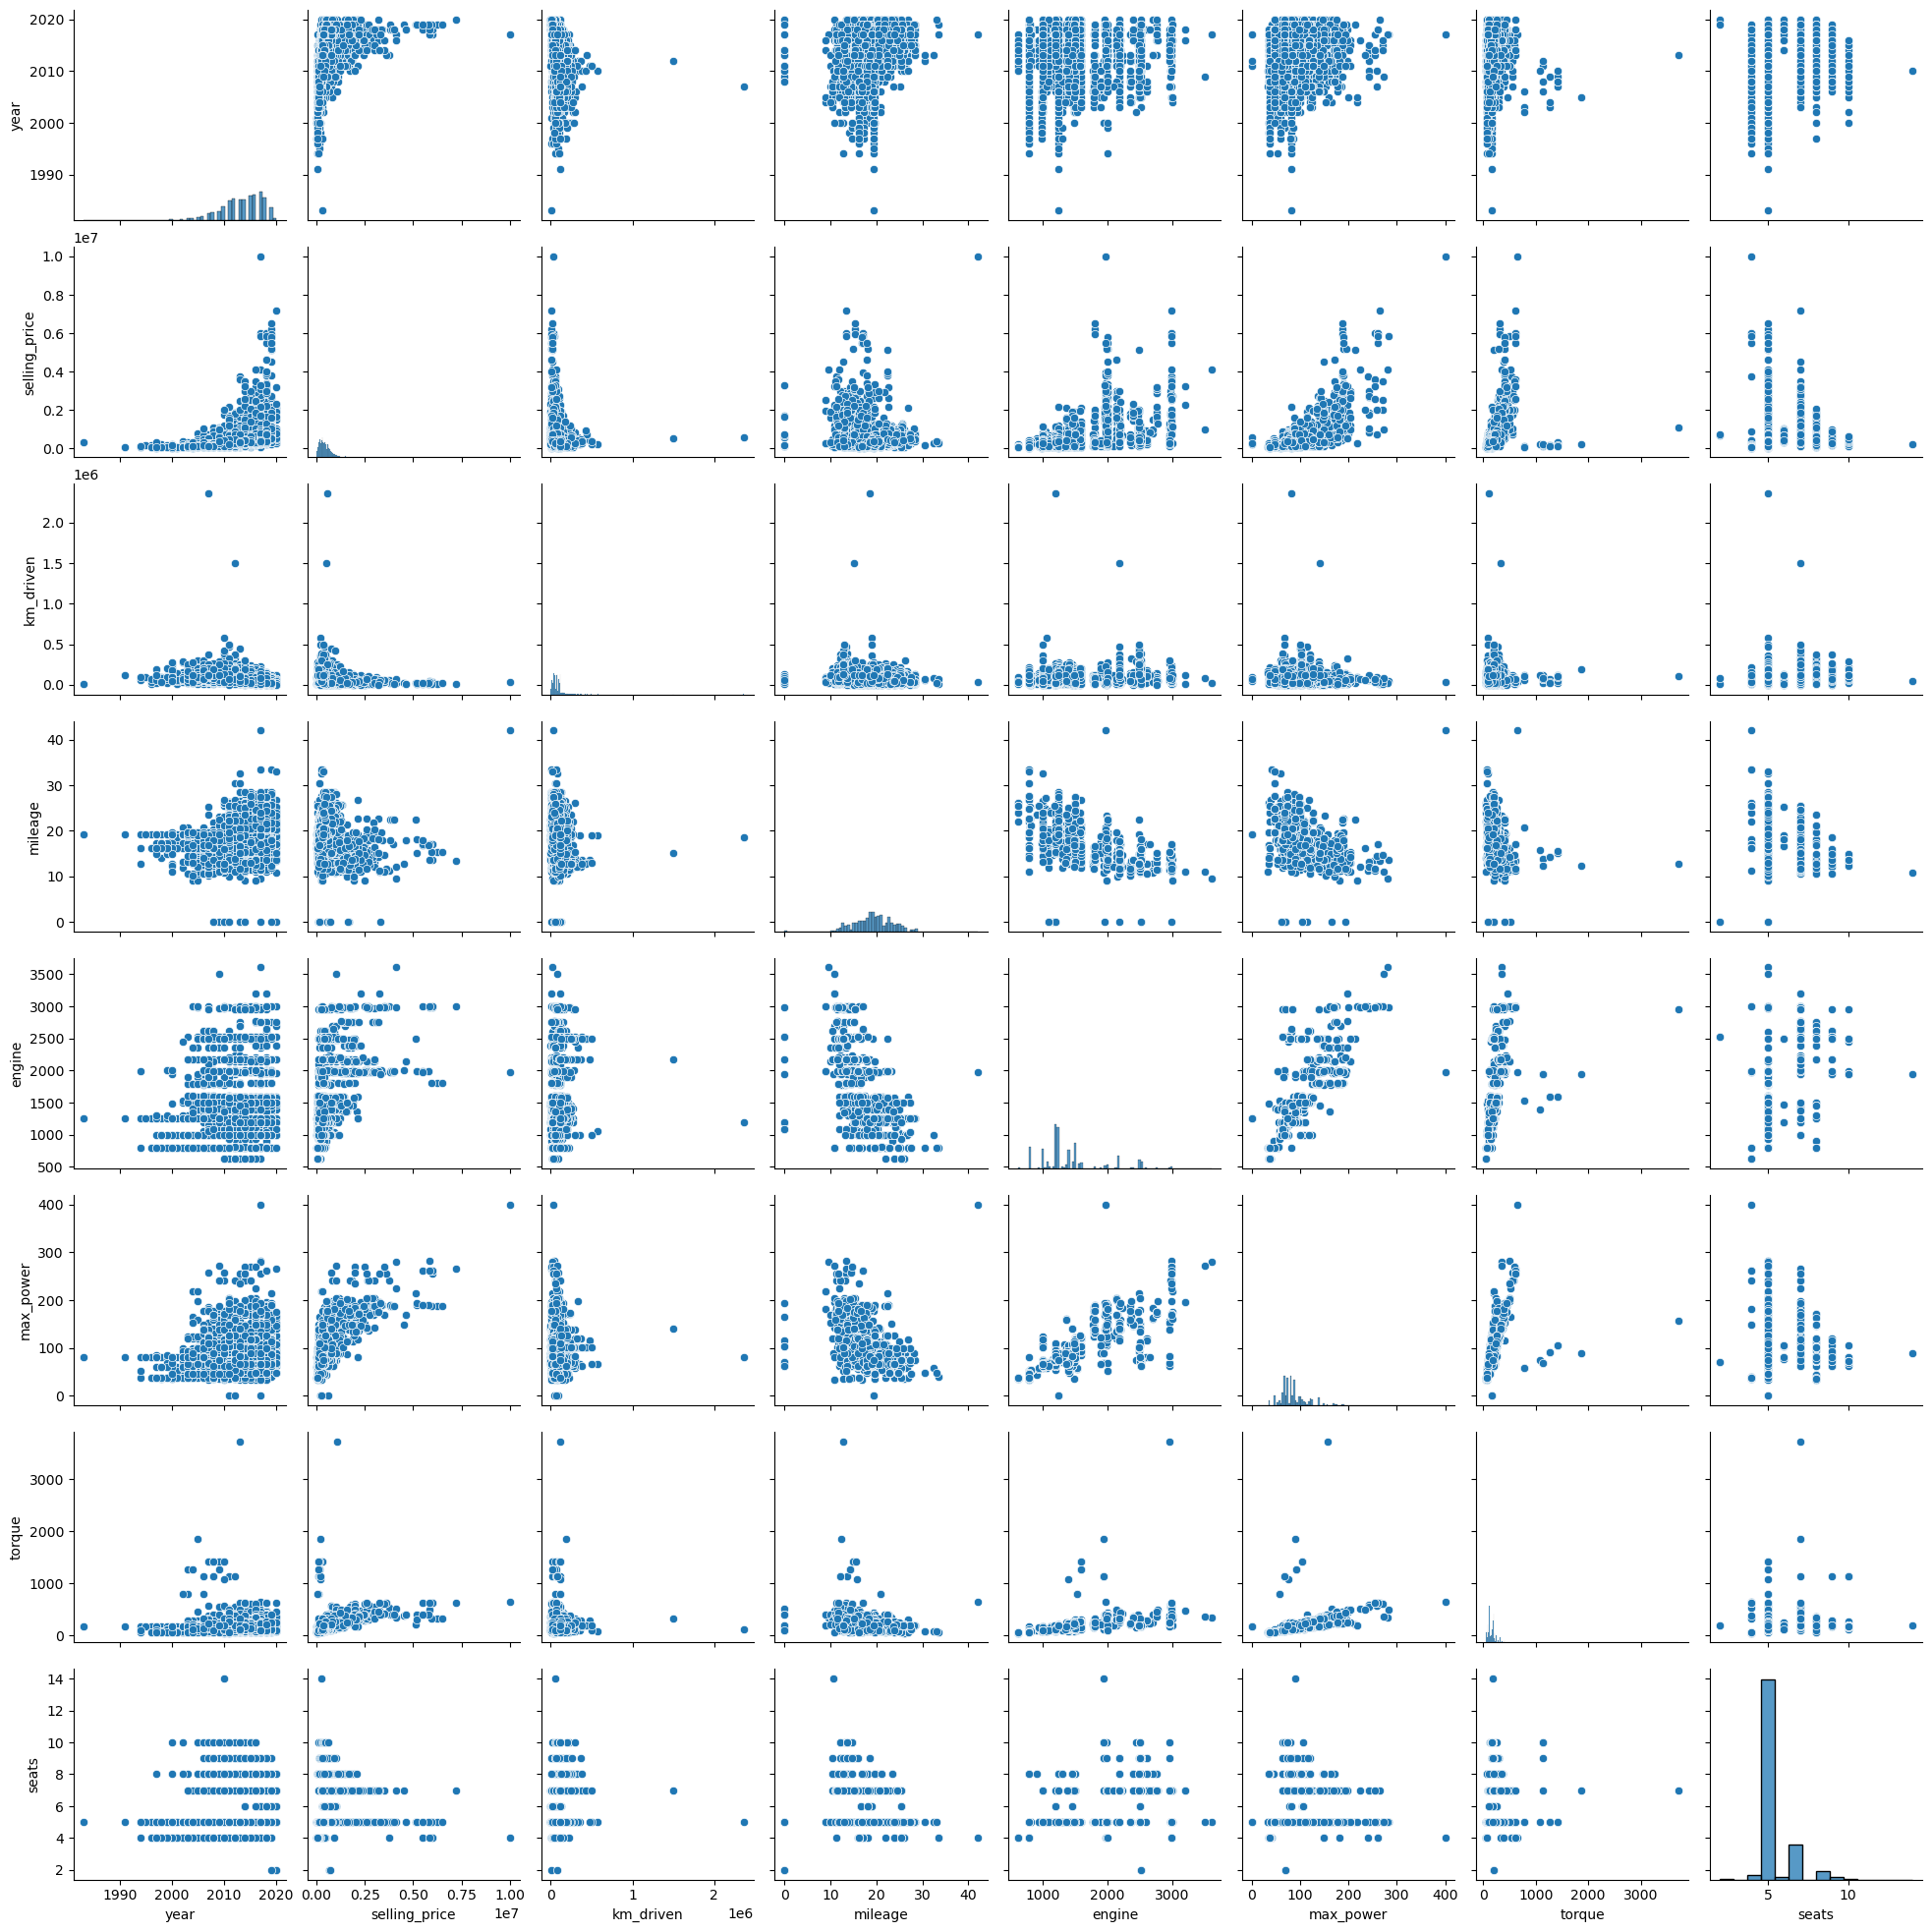

In [2719]:
plt.show()

`Ответ:`
1. Связь признаков с целевой переменной видна слабовато, можно выделить, например, что высокие значения цены есть при низких `km_driven` (но все равно по графику кажется, что и так большинство значений этого фактора низкие, хотя это может быть за счет выбросов), аналогично про `mileage`. С `year` видна неплохая зависимость - высокая цена действительно есть у более новых машин (что логично), и причем цена возрастает резко, нелинейно с увеличением года выпуска машины. Также с `max_power` есть подобие связи, причем связь отдаленно похожа на что-то окололинейное.
2. Про признаки - видна очень хорошая корреляция между `engine` и `max_power` (причем похожа на линейную), что логично. Также скоррелирован рост между `torque` и переменными `engine`, `max_power` (слабая линейная связь)

In [2721]:
# your code here
sns.pairplot(df_test)

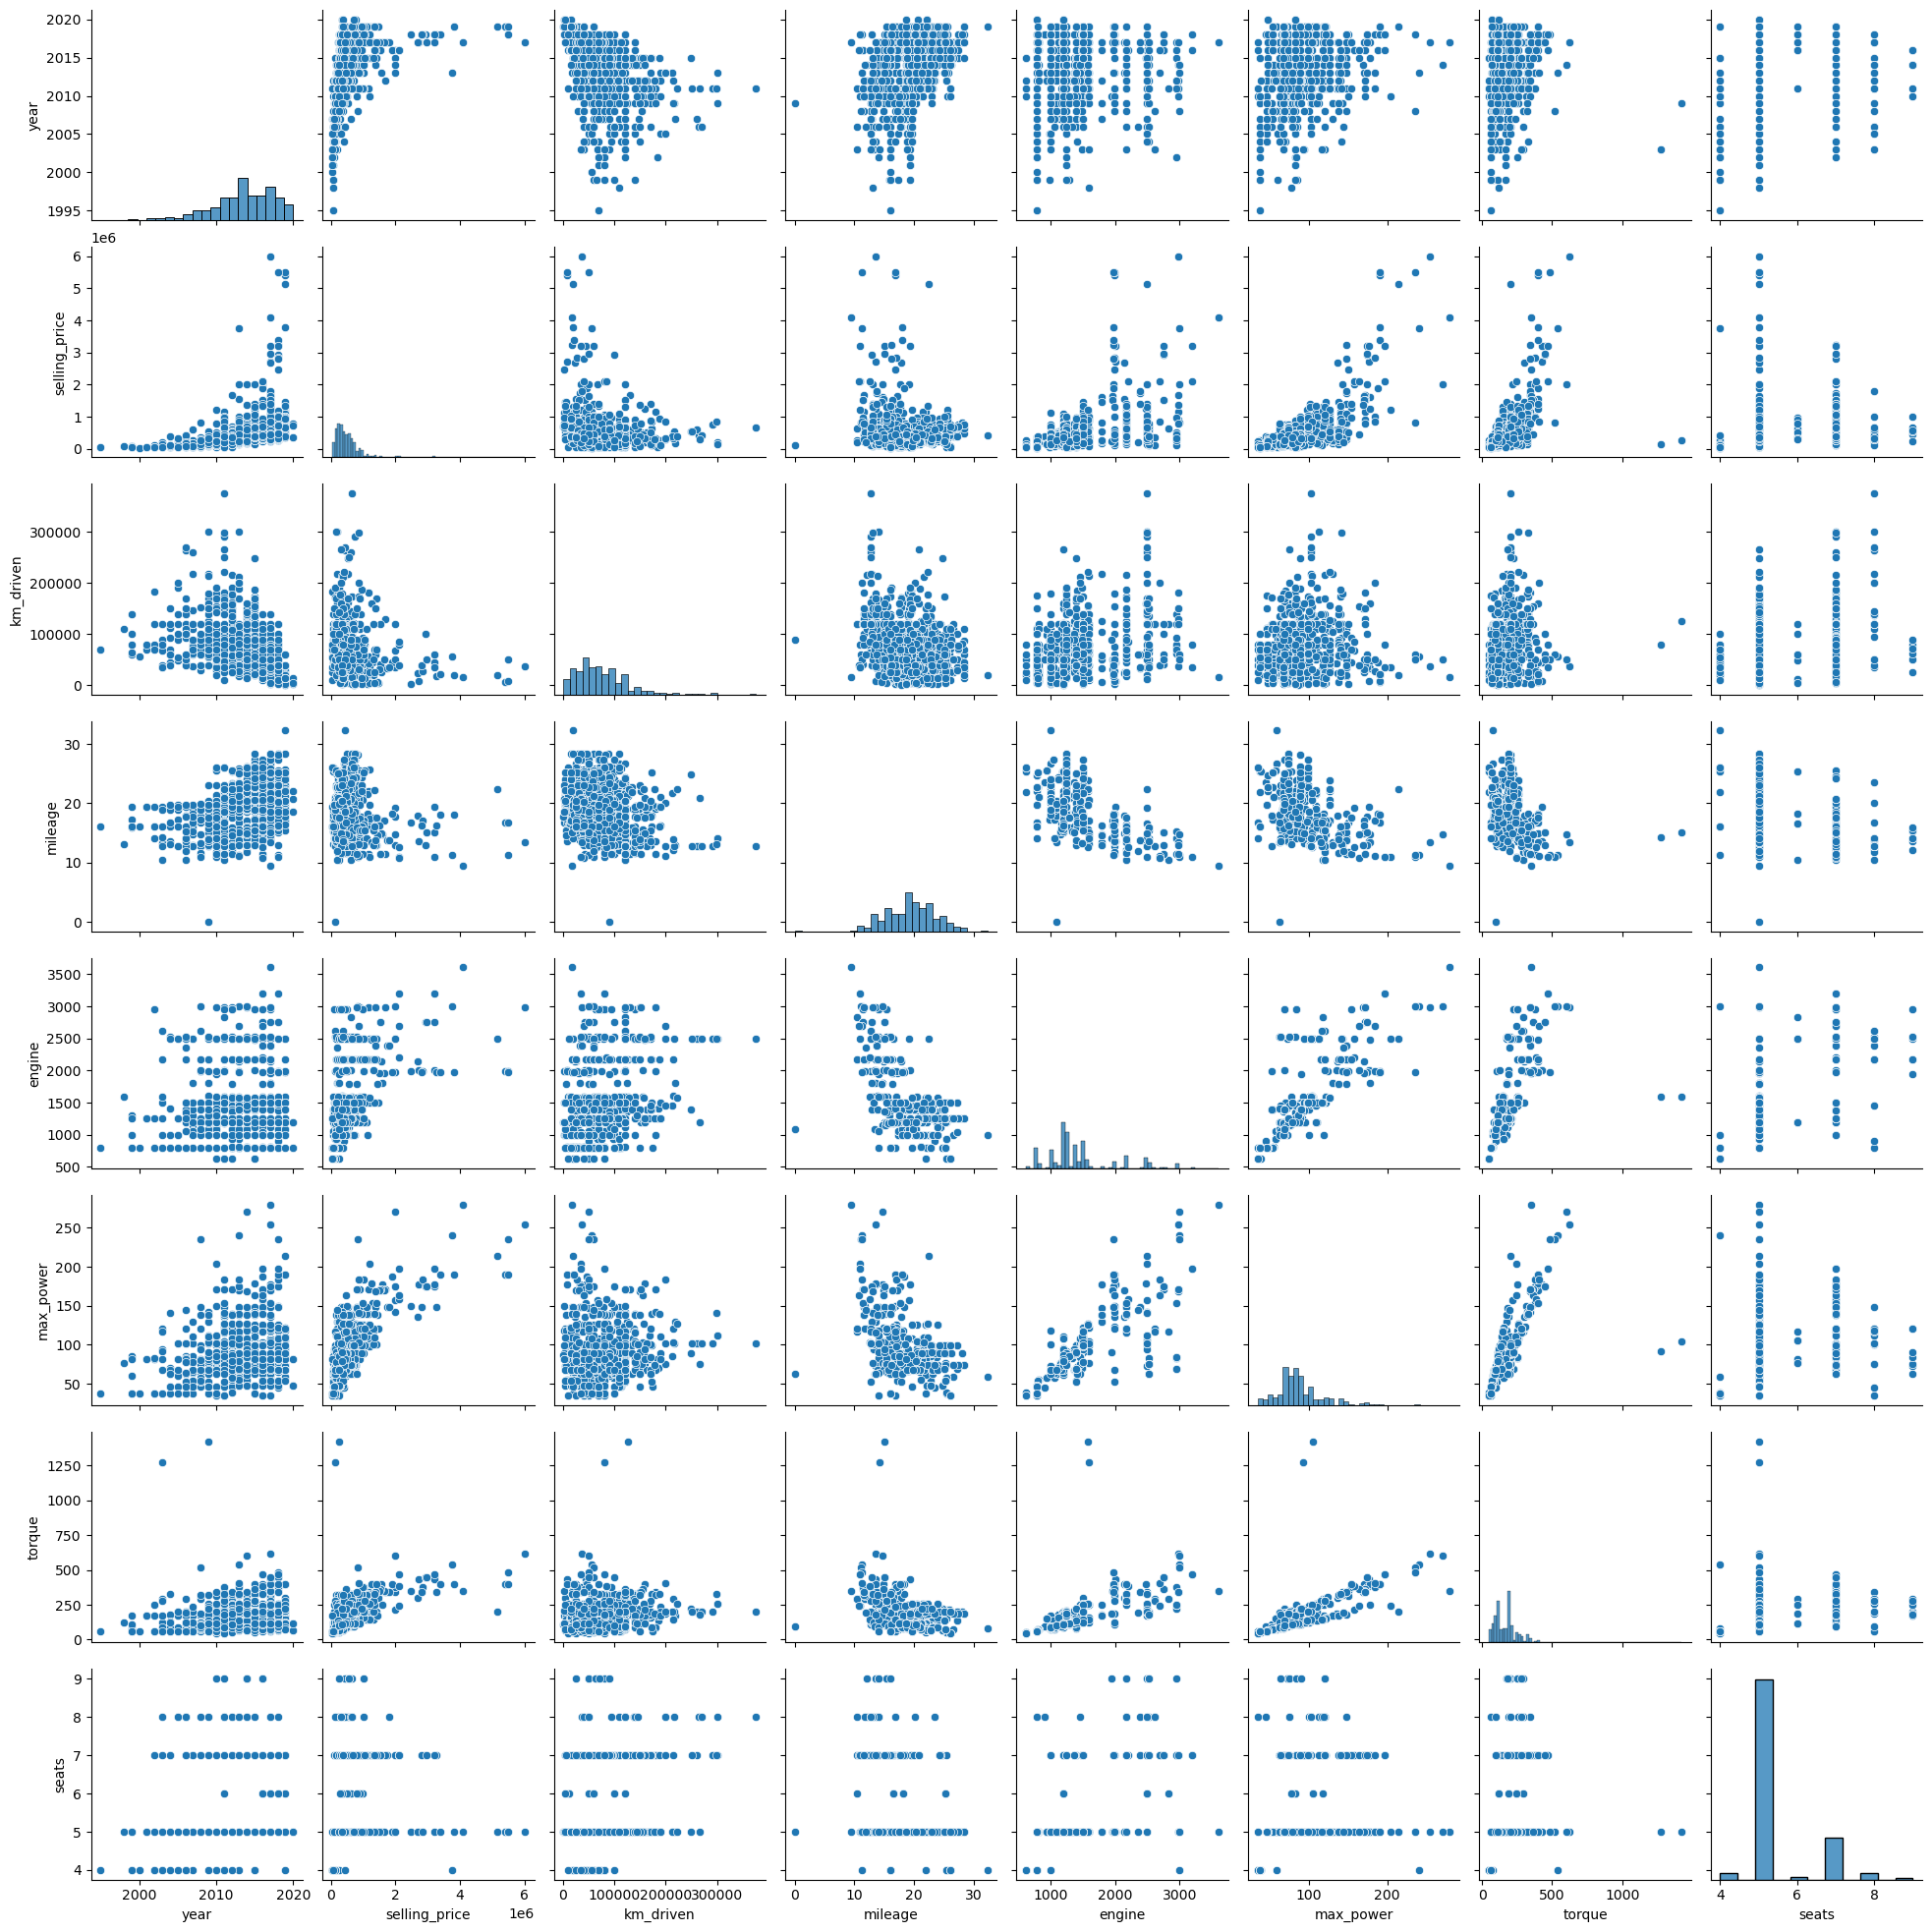

In [2722]:
plt.show()

`Ответ:` если посмотреть на диагональные графики, то по распределениям сущности test и train действительно похожи. Это так же демонстрировала нам табличка с описательными статистиками ранее.


### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [2725]:
# your code here
corr_matrix = df_train.select_dtypes(include=['number']).corr(method='pearson')  # строим ток по числовым признакам
corr_matrix

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.342172  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104458  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182245  0.229766   
mileage        0.342172      -0.104458  -0.182245  1.000000 -0.572677   
engine         0.002819       0.447672   0.229766 -0.572677  1.000000   
max_power      0.156648       0.692754   0.024630 -0.373271  0.681082   
torque         0.044115       0.431711   0.107426 -0.226318  0.565175   
seats          0.041178       0.149953   0.192328 -0.450810  0.652172   

               max_power    torque     seats  
year            0.156648  0.044115  0.041178  
selling_price   0.692754  0.431711  0.149953  
km_driven       0.024630  0.107426  0.192328  
mileage        -0.373271 -0.226318 -0.450810  
engine          0.681082  0.565175  0.652172  
max_power       1.000000  0.615729  0.244060  
torque          0.615729  1.000000  0.297028  
seats           0.244060  0.297028  1.000000

In [2726]:
# стриом хитмапу 
sns.heatmap(corr_matrix, annot=True, center=0)

<Axes: >

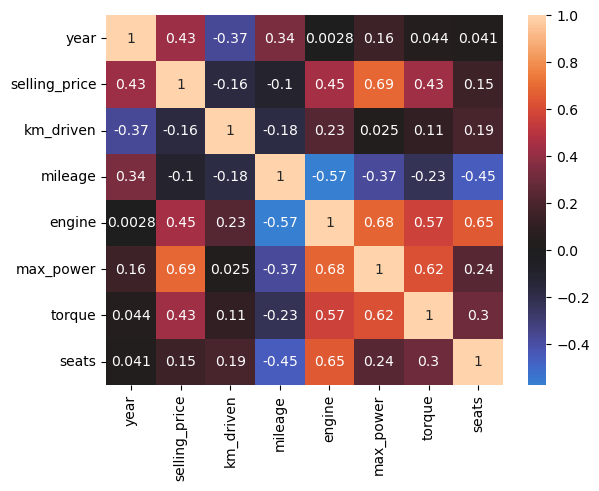

In [2727]:
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Ответ:`
1. Наименьшая корреляция между признаками - engine и year (всего 0.0028)
2. сильная положительная лин. зависимость - между парами признаков: selling_price и max_power, engine и max_power, engine и seats, остановимся на них, хоть и корреляция между max_power и torque не сильно отличается от корреляции engine и seats
3. здесь очень важна эта степень "скорее всего" - но в целом да, видна отрицательная корреляция = -0.37 между этими признаками. Это означает, что при росте year уменьшается km_driven, или другими словами - чем моложе машина, тем меньше она проехала

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [2731]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [2734]:
# копии датафреймов только с числовыми признаками
df_train_numeric = df_train.select_dtypes(include=['number']).copy()
df_test_numeric = df_test.select_dtypes(include=['number']).copy()

In [2735]:
y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop(columns=['selling_price'])  # your code here

In [2736]:
# опишите выбранные вещественные признаки
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       5840 non-null   int64  
 1   km_driven  5840 non-null   int64  
 2   mileage    5840 non-null   float64
 3   engine     5840 non-null   int64  
 4   max_power  5840 non-null   float64
 5   torque     5840 non-null   float64
 6   seats      5840 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 319.5 KB


не понятно, что имеется в виду в ячейке выше, видимо описать сущности признаков числовых:

- year: год выпуска
- km_driven: пробег
- mileage: расход топлива
- engine: объем двигателя
- max_power: максимальная мощность двигателя
- torque: крутящий момент двигателя
- seats - кол-во мест в машине

In [2738]:
y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop(columns=['selling_price'])   # your code here

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [2740]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()  # инициализируем модель 

model.fit(X_train, y_train)  # обучаем модель 

LinearRegression()

In [2741]:
# посчитаем метрики качества, для этого прогоним модель на наших признаках
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# R^2
print('R^2 на трейне:', r2_score(y_train, y_train_predict))

print('R^2 на тесте:', r2_score(y_test, y_test_predict))

# MSE
print('MSE на трейне:', MSE(y_train, y_train_predict))

print('MSE на тесте:', MSE(y_test, y_test_predict))



R^2 на трейне: 0.5927927865685232
R^2 на тесте: 0.616223383901233
MSE на трейне: 116721199025.3438
MSE на тесте: 137420963183.24481


In [2742]:
y_test.mean()

550118.1997851772

Обернем все в функцию для удобства:

In [2744]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    # R^2
    print('R^2 на трейне:', r2_score(y_train, y_train_predict))
    print('R^2 на тесте:', r2_score(y_test, y_test_predict))
    
    # MSE
    print('MSE на трейне:', MSE(y_train, y_train_predict))
    print('MSE на тесте:', MSE(y_test, y_test_predict))


def linear_regression(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test)

    return model 

In [2745]:
model = linear_regression(X_train, y_train, X_test, y_test)  # проверяю, что резы те же

R^2 на трейне: 0.5927927865685232
R^2 на тесте: 0.616223383901233
MSE на трейне: 116721199025.3438
MSE на тесте: 137420963183.24481


**Выводы**:
По R^2 можно сказать, что тест немного лучше трейна, что уже является положительным сигналом, что мы не переобучаемся, и предсказательная сила в виде 62% тоже неплохая, стоит сказать, что потенциал на улучшение точно есть

По MSE - вообще она сама по себе не очень хорошо интерпретируется, лучше брать RMSE, чтобы быть в тех же единицах измерения, и вот если глянуть на него, то получается разброс в цене в 371К при средней цене автомобиля в 550К, это довольно плохо, потому что мы ошибаемся на большую часть от цены самого автомобиля, однако здесь могут сильно сказываться выбросы, поэтому результат неоднозначен

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [2748]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()  # инициализируем стандартизатор

scaler.fit(X_train)  # обучаем стандартизатор

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [2749]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [2750]:
# вызываем модель 
model = linear_regression(X_train_scaled, y_train, X_test_scaled, y_test)

R^2 на трейне: 0.5927927865685246
R^2 на тесте: 0.6162233839012369
MSE на трейне: 116721199025.34337
MSE на тесте: 137420963183.24342


Видим, что стандартизация нам вообще погоды не сделала

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

Посмотрим на коэффициенты при всех признаках:

In [2754]:
# your code here
for x_feature, x_beta in zip(X_train.columns, model.coef_):
    print(f'`{x_feature}`', ': _beta is:', x_beta)

`year` : _beta is: 154431.11132957338
`km_driven` : _beta is: -44360.345074440644
`mileage` : _beta is: 25623.5879781862
`engine` : _beta is: 56339.18192616401
`max_power` : _beta is: 314816.08735699527
`torque` : _beta is: 16466.867099839405
`seats` : _beta is: -24461.081356146875


`Ответ`:
    наиболее важный признак здесь - `max_power`, так как он имеет наибольший по модулю коэффициент в модели. Значит, на цену автомобиля больше всего влияет именно максимальная мощность двигателя

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

Для вызова функции обучения дотюним ее и добавим параметр модели, чтобы можно было инициализировать необходимую модель

И добавим оценку RMSE в итог, ее все же проще интерпретировать


In [2758]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    # R^2
    print('R^2 на трейне:', r2_score(y_train, y_train_predict))
    print('R^2 на тесте:', r2_score(y_test, y_test_predict))
    
    # MSE
    print('MSE на трейне:', MSE(y_train, y_train_predict))
    print('MSE на тесте:', MSE(y_test, y_test_predict))

    # RMSE
    print('RMSE на трейне:', MSE(y_train, y_train_predict)**0.5)
    print('RMSE на тесте:', MSE(y_test, y_test_predict)**0.5)


def linear_model_regression(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test)

    return model 


In [2759]:
from sklearn.linear_model import Lasso

# your code here
model = Lasso()  # lasso регерссия с дефолтным alpha = 1.0

In [2760]:
# вызываем модель 
model = linear_model_regression(model, X_train_scaled, y_train, X_test_scaled, y_test)

R^2 на трейне: 0.592792786533488
R^2 на тесте: 0.6162229211779389
MSE на трейне: 116721199035.38622
MSE на тесте: 137421128873.07089
RMSE на трейне: 341644.84341986815
RMSE на тесте: 370703.5592937717


In [2761]:
# your code here
for x_feature, x_beta in zip(X_train.columns, model.coef_):
    print(f'`{x_feature}`', ': _beta is:', x_beta)

`year` : _beta is: 154430.9162470249
`km_driven` : _beta is: -44359.21618338041
`mileage` : _beta is: 25621.76848765585
`engine` : _beta is: 56334.5269199947
`max_power` : _beta is: 314817.10520912585
`torque` : _beta is: 16466.494798306536
`seats` : _beta is: -24458.21265188625


Лассо-регрессия так же показала себя не лучше остальных. Никакие признаки у модели не занулились (что в целом ожидаемо, так как L1 зануляет обычно и так низкие к нулю веса, а в контексте наших данных веса далеки от нуля).

Ну и как я понимаю, тут можно покрутить параметр альфа. Если устремить его вверх, то веса, соразмерные этому альфа, будут зануляться 

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [2764]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'alpha': np.logspace(-4, 2, 10)  # 10 значений от 0.0001 до 100
}
# такую сетку предложил дипсик, потому что при первом значении регуляризации почти нет (= обычная линрег), а при значении 
# в 100 регуляризация настолько сильная, что зануляет почти все 


lasso = Lasso()  # задаем модель

# инициализируем ниже грид серч
grid_search = GridSearchCV(
    estimator=lasso,  # какую модель юзаем
    param_grid=param_grid,  # параметры для перебора сетки
    cv=10,  # 10 фолдов
    scoring='neg_mean_squared_error',  # как оцениваем лучшую модель - максимиризуем -1*MSE = минимизируем MSE
    n_jobs=-1,  # используем все ядра для распараллеливания
    # verbose=0 
)

In [2765]:
# your code here
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

>Сколько грид-сёрчу пришлось обучать моделей?

На самом деле этот параметр заранее известен, так как я указываю сетку перебираемых параметров заранее, в моем случае она состоит из 10 параметров, поэтому моделей как бы 10. Но тут еще можно учитывать, что фолдов было 10, поэтому на каждый из параметров модель обучалась по факту 10 раз. Выходит 10 * 10 = 100. Ну или 10, если мы говорим именно о различающихся моделях

In [2767]:
grid_search

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [2769]:
# возьмем лучшую модель 
best_model = grid_search.best_estimator_
best_model

Lasso(alpha=100.0)

In [2770]:
print(f'Лучший параметр регуляризации: {grid_search.best_params_['alpha']}')

Лучший параметр регуляризации: 100.0


Проверяем зануление весов, хотя можно заранее сказать, что при таком параметре регуляризации и наших весах, вряд ли зануление произошло.

In [2772]:
for x_feature, x_beta in zip(X_train.columns, best_model.coef_):
    print(f'`{x_feature}`', ': _beta is:', x_beta)

`year` : _beta is: 154409.0647714681
`km_driven` : _beta is: -44247.12647316039
`mileage` : _beta is: 25443.13353102516
`engine` : _beta is: 55867.07306752553
`max_power` : _beta is: 314922.6675817845
`torque` : _beta is: 16429.284057141776
`seats` : _beta is: -24170.251734313286


Ну и оценим качество:

In [2774]:
evaluate_model(best_model, X_train_scaled, y_train, X_test_scaled, y_test)

R^2 на трейне: 0.5927924309664527
R^2 на тесте: 0.6161767095550289
MSE на трейне: 116721300954.5304
MSE на тесте: 137437676118.17169
RMSE на трейне: 341644.99257932993
RMSE на тесте: 370725.8773247043


Ура, RMSE увеличили на целых 15 копеек на трейне, можно идти устраиваться дата сайентистом

Стало понятно, что сетка не очень удачна для наших параметров. Давайте переберем все-таки теперь параметры альфа побольше:

In [2777]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'alpha': np.linspace(100, 10000, 20)  
}


lasso = Lasso()  # задаем модель

# инициализируем ниже грид серч
grid_search = GridSearchCV(
    estimator=lasso,  # какую модель юзаем
    param_grid=param_grid,  # параметры для перебора сетки
    cv=10,  # 10 фолдов
    scoring='neg_mean_squared_error',  # как оцениваем лучшую модель - максимиризуем -1*MSE = минимизируем MSE
    n_jobs=-1,  # используем все ядра для распараллеливания
    # verbose=0 
)

In [2778]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([  100.        ,   621.05263158,  1142.10526316,  1663.15789474,
        2184.21052632,  2705.26315789,  3226.31578947,  3747.36842105,
        4268.42105263,  4789.47368421,  5310.52631579,  5831.57894737,
        6352.63157895,  6873.68421053,  7394.73684211,  7915.78947368,
        8436.84210526,  8957.89473684,  9478.94736842, 10000.        ])},
             scoring='neg_mean_squared_error')

In [2779]:
best_model_again = grid_search.best_estimator_

In [2780]:
evaluate_model(best_model_again, X_train_scaled, y_train, X_test_scaled, y_test)

R^2 на трейне: 0.5927468844825057
R^2 на тесте: 0.6156583794799229
MSE на трейне: 116734356323.00702
MSE на тесте: 137623277364.2611
RMSE на трейне: 341664.0986744247
RMSE на тесте: 370976.1142772687


Ну, тут стало немного побольше, но все равно продвижек нет.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

Для этой модели поменяем сетку, нужно будет перебирать 2 параметра: alpha (сила регуляризации) и l1_ratio (насколько сильно учитываем l1 по сравнению с l2)

In [2784]:
from sklearn.linear_model import ElasticNet


param_grid = {
    'alpha': np.logspace(-4, 2, 10),      # сила регуляризации
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # смесь L1/L2
}
# такую сетку по l1_ratio предложил дипсик, выглядит ок
# и я вернул перебор альфы так, как делал в первой итерации, так увидел, что среди 
# np.linspace(100, 10000, 20) лушчим параметром альфа был 100 (нижняя граница)


elnet = ElasticNet()  # задаем модель

# инициализируем ниже грид серч
grid_search = GridSearchCV(
    estimator=elnet,  # какую модель юзаем
    param_grid=param_grid,  # параметры для перебора сетки
    cv=10,  # 10 фолдов
    scoring='neg_mean_squared_error',  # как оцениваем лучшую модель - максимиризуем -1*MSE = минимизируем MSE
    n_jobs=-1,  # используем все ядра для распараллеливания
    # verbose=0 
)
grid_search.fit(X_train_scaled, y_train)

# возьмем лучшую модель 
best_model = grid_search.best_estimator_
best_model

ElasticNet(alpha=0.01, l1_ratio=0.3)

В этом случае мы перебирали моделей 20 (кол-во параметра альфа) * 5 (кол-во парамета l1_ratio) * 10 фолдов = 1000 моделей (либо 100 различающихся по параметрам)

Лучшей комбинацией параметров стала alpha=0.01, l1_ratio=0.3

In [2786]:
evaluate_model(best_model, X_train_scaled, y_train, X_test_scaled, y_test)

R^2 на трейне: 0.5927613343577207
R^2 на тесте: 0.6156105014436809
MSE на трейне: 116730214434.78587
MSE на тесте: 137640421310.97308
RMSE на трейне: 341658.0372752643
RMSE на тесте: 370999.2200948313


Ну, здесь мы ничего особо не изменили

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [2790]:
df_train.drop('name', axis=1, inplace=True)
df_test.drop('name', axis=1, inplace=True)

In [2791]:
X_train_cat = df_train.copy()
X_train_cat.drop('selling_price', axis=1, inplace=True)

In [2792]:
X_train_cat

year  km_driven    fuel seller_type transmission                 owner  \
0     2014     145500  Diesel  Individual       Manual           First Owner   
1     2014     120000  Diesel  Individual       Manual          Second Owner   
2     2010     127000  Diesel  Individual       Manual           First Owner   
3     2007     120000  Petrol  Individual       Manual           First Owner   
4     2017      45000  Petrol  Individual       Manual           First Owner   
...    ...        ...     ...         ...          ...                   ...   
5835  2008     191000  Petrol  Individual       Manual           First Owner   
5836  2013      50000  Petrol  Individual       Manual          Second Owner   
5837  2013     110000  Petrol  Individual       Manual           First Owner   
5838  2007     119000  Diesel  Individual       Manual  Fourth & Above Owner   
5839  2009     120000  Diesel  Individual       Manual           First Owner   

      mileage  engine  max_power      torque  seats  
0       23.40    1248      74.00  190.000000      5  
1       21.14    1498     103.52  250.000000      5  
2       23.00    1396      90.00  219.668960      5  
3       16.10    1298      88.20  112.776475      5  
4       20.14    1197      81.86  113.750000      5  
...       ...     ...        ...         ...    ...  
5835    17.92    1086      62.10   96.100000      5  
5836    18.90     998      67.10   90.000000      5  
5837    18.50    1197      82.85  113.700000      5  
5838    16.80    1493     110.00  235.359600      5  
5839    19.30    1248      73.90  190.000000      5  

[5840 rows x 11 columns]

In [2793]:
X_test_cat = df_test.copy()
X_test_cat.drop('selling_price', axis=1, inplace=True)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [2795]:
assert X_train_cat.shape == (5840, 10)

AssertionError: 

Assert не прошел, так как я предобрабатывал `torque` ранее, а не удалял его

In [2796]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [2799]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
encoder = OneHotEncoder(
    sparse_output=False,  # чтобы получить массив, а не sparse matrix
    drop='first',  # убираем одну категорию (избегаем мультиколлинеарность, сразу удаляем одну колонку)
)

In [2801]:
# все фичи для преобразований
cat_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

feat_encoded = encoder.fit_transform(X_train_cat[cat_features])  # применяем one hot

feat_names = encoder.get_feature_names_out(cat_features)  # для названий колонок на выходе

X_train_cat = pd.DataFrame(feat_encoded, columns=feat_names)  # полученные колонки в DataFrame
    

In [2803]:
X_train_cat

fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0             1.0       0.0          0.0                     1.0   
1             1.0       0.0          0.0                     1.0   
2             1.0       0.0          0.0                     1.0   
3             0.0       0.0          1.0                     1.0   
4             0.0       0.0          1.0                     1.0   
...           ...       ...          ...                     ...   
5835          0.0       0.0          1.0                     1.0   
5836          0.0       0.0          1.0                     1.0   
5837          0.0       0.0          1.0                     1.0   
5838          1.0       0.0          0.0                     1.0   
5839          1.0       0.0          0.0                     1.0   

      seller_type_Trustmark Dealer  transmission_Manual  \
0                              0.0                  1.0   
1                              0.0                  1.0   
2                              0.0                  1.0   
3                              0.0                  1.0   
4                              0.0                  1.0   
...                            ...                  ...   
5835                           0.0                  1.0   
5836                           0.0                  1.0   
5837                           0.0                  1.0   
5838                           0.0                  1.0   
5839                           0.0                  1.0   

      owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                            0.0                 0.0                   0.0   
1                            0.0                 1.0                   0.0   
2                            0.0                 0.0                   0.0   
3                            0.0                 0.0                   0.0   
4                            0.0                 0.0                   0.0   
...                          ...                 ...                   ...   
5835                         0.0                 0.0                   0.0   
5836                         0.0                 1.0                   0.0   
5837                         0.0                 0.0                   0.0   
5838                         1.0                 0.0                   0.0   
5839                         0.0                 0.0                   0.0   

      owner_Third Owner  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  \
0                   0.0      0.0      1.0      0.0      0.0      0.0      0.0   
1                   0.0      0.0      1.0      0.0      0.0      0.0      0.0   
2                   0.0      0.0      1.0      0.0      0.0      0.0      0.0   
3                   0.0      0.0      1.0      0.0      0.0      0.0      0.0   
4                   0.0      0.0      1.0      0.0      0.0      0.0      0.0   
...                 ...      ...      ...      ...      ...      ...      ...   
5835                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
5836                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
5837                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
5838                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
5839                0.0      0.0      1.0      0.0      0.0      0.0      0.0   

      seats_10  seats_14  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0  
...        ...       ...  
5835       0.0       0.0  
5836       0.0       0.0  
5837       0.0       0.0  
5838       0.0       0.0  
5839       0.0       0.0  

[5840 rows x 18 columns]

Для seats видно, что действительно все проставляется правильно, и одного столбца (для seats = 2) нет

Повторим для теста


In [2807]:
feat_encoded = encoder.fit_transform(X_test_cat[cat_features])  # применяем one hot

feat_names = encoder.get_feature_names_out(cat_features)  # для названий колонок на выходе

X_test_cat = pd.DataFrame(feat_encoded, columns=feat_names)  # полученные колонки в DataFrame


Также, но не очевидно из задания: видимо, нужно, чтобы все-таки чичсловые признаки были отмасштабированными, заскейлим их (только не будем скейлить seats, он у нас теперь в one hot кодировке)

In [2810]:
X_train_scaled_cat = pd.DataFrame(X_train_scaled, columns=['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats'])
X_train_scaled_cat.drop('seats', axis=1, inplace=True)

X_test_scaled_cat = pd.DataFrame(X_test_scaled, columns=['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats'])
X_test_scaled_cat.drop('seats', axis=1, inplace=True)

In [2811]:
X_train_full = pd.concat([X_train_scaled_cat, X_train_cat], axis=1)
X_test_full = pd.concat([X_test_scaled_cat, X_test_cat], axis=1)

Также в тест надо добавить 3 колонки для `seats`, так как в трейне есть такие значения этого поля, которых нет в тесте, поэтому при one hot кодировании они просто пропускаются (их придется инсертить ровно на то место, где они в трейне)

In [2815]:
X_train_full

year  km_driven   mileage    engine  max_power    torque  \
0     0.139570   1.191152  0.996413 -0.373643  -0.439701  0.117800   
1     0.139570   0.766619  0.429384  0.141162   0.493387  0.631863   
2    -0.837167   0.883158  0.896054 -0.068879   0.066037  0.371996   
3    -1.569719   0.766619 -0.835142 -0.270682   0.009142 -0.543829   
4     0.872122  -0.482007  0.178486 -0.478663  -0.191257 -0.535488   
...        ...        ...       ...       ...        ...       ...   
5835 -1.325535   1.948653 -0.378507 -0.707236  -0.815845 -0.686708   
5836 -0.104614  -0.398765 -0.132627 -0.888447  -0.657801 -0.738972   
5837 -0.104614   0.600136 -0.232987 -0.478663  -0.159965 -0.535917   
5838 -1.569719   0.749971 -0.659513  0.130865   0.698211  0.506429   
5839 -1.081351   0.766619 -0.032268 -0.373643  -0.442862  0.117800   

      fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  ...  \
0             1.0       0.0          0.0                     1.0  ...   
1             1.0       0.0          0.0                     1.0  ...   
2             1.0       0.0          0.0                     1.0  ...   
3             0.0       0.0          1.0                     1.0  ...   
4             0.0       0.0          1.0                     1.0  ...   
...           ...       ...          ...                     ...  ...   
5835          0.0       0.0          1.0                     1.0  ...   
5836          0.0       0.0          1.0                     1.0  ...   
5837          0.0       0.0          1.0                     1.0  ...   
5838          1.0       0.0          0.0                     1.0  ...   
5839          1.0       0.0          0.0                     1.0  ...   

      owner_Test Drive Car  owner_Third Owner  seats_4  seats_5  seats_6  \
0                      0.0                0.0      0.0      1.0      0.0   
1                      0.0                0.0      0.0      1.0      0.0   
2                      0.0                0.0      0.0      1.0      0.0   
3                      0.0                0.0      0.0      1.0      0.0   
4                      0.0                0.0      0.0      1.0      0.0   
...                    ...                ...      ...      ...      ...   
5835                   0.0                0.0      0.0      1.0      0.0   
5836                   0.0                0.0      0.0      1.0      0.0   
5837                   0.0                0.0      0.0      1.0      0.0   
5838                   0.0                0.0      0.0      1.0      0.0   
5839                   0.0                0.0      0.0      1.0      0.0   

      seats_7  seats_8  seats_9  seats_10  seats_14  
0         0.0      0.0      0.0       0.0       0.0  
1         0.0      0.0      0.0       0.0       0.0  
2         0.0      0.0      0.0       0.0       0.0  
3         0.0      0.0      0.0       0.0       0.0  
4         0.0      0.0      0.0       0.0       0.0  
...       ...      ...      ...       ...       ...  
5835      0.0      0.0      0.0       0.0       0.0  
5836      0.0      0.0      0.0       0.0       0.0  
5837      0.0      0.0      0.0       0.0       0.0  
5838      0.0      0.0      0.0       0.0       0.0  
5839      0.0      0.0      0.0       0.0       0.0  

[5840 rows x 24 columns]

In [2817]:
outs_of_test = ['seats_4', 'seats_10', 'seats_14']
for out_of_test in outs_of_test:
    idx = X_train_full.columns.get_loc(out_of_test)  
    X_test_full.insert(idx, out_of_test, 0.0)  # ставим на то же место что и в трейне

In [2819]:
X_test_full.shape

(931, 24)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [2822]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here 
ridge = Ridge()

from sklearn.linear_model import ElasticNet


param_grid = {
    # 'alpha': np.logspace(-4, 2, 10),  # сила регуляризации для L2
    'alpha': np.linspace(1, 100, 10)
}

# инициализируем ниже грид серч
grid_search = GridSearchCV(
    estimator=ridge,  # какую модель юзаем
    param_grid=param_grid,  # параметры для перебора сетки
    cv=10,  # 10 фолдов
    scoring='r2',  # как оцениваем лучшую модель - максимиризуем R^2
    n_jobs=-1,  # используем все ядра для распараллеливания
    # verbose=0 
)
grid_search.fit(X_train_full, y_train)

# возьмем лучшую модель 
best_model = grid_search.best_estimator_
best_model

Ridge(alpha=12.0)

In [2823]:
evaluate_model(best_model, X_train_full, y_train, X_test_full, y_test)

R^2 на трейне: 0.6525027214162349
R^2 на тесте: 0.653908229621363
MSE на трейне: 99606042517.13803
MSE на тесте: 123926947187.90997
RMSE на трейне: 315604.24984010914
RMSE на тесте: 352032.5939283321


Качество дейсттвительно получилось улучшить, так как RMSE упал, а R^2 подрос - добавление категориальных фичей положительно сказалось, ну и сама ридж регрессия отработала возможно лучше

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [2826]:
def business_metric(y_true, y_pred):
    diff = abs(y_pred - y_true)
    reldiff = diff / y_true

    return len(reldiff[reldiff <= 0.1]) / len(reldiff)

# проверка метрики
business_metric(y_test, y_test_predict)

0.23093447905477982

Обернем метрику для оценки на всех моделях:

In [2829]:
# параметры моделей для перебора
models_info = {
    'linreg': LinearRegression() ,
    'linreg_scaled': LinearRegression(),
    'lasso': Lasso(),
    'lasso_best': Lasso(alpha=1142.1052631578948),
    'elastic_best': ElasticNet(alpha=0.01, l1_ratio=0.3),
    'ridge_best': Ridge(alpha=12.0)
}

# признаки для перебора
features_info = {
    'linreg': [X_train, X_test],
    'linreg_scaled': [X_train_scaled, X_test_scaled],
    'lasso': [X_train_scaled, X_test_scaled],
    'lasso_best': [X_train_scaled, X_test_scaled],
    'elastic_best': [X_train_scaled, X_test_scaled],
    'ridge_best': [X_train_full, X_test_full]
}

In [2831]:
def format_business_metrics(y_train, y_test, y_train_predict, y_test_predict):

    print('Business metric: train =', business_metric(y_train, y_train_predict), '| test = ', business_metric(y_test, y_test_predict))

def format_r2_score(y_train, y_test, y_train_predict, y_test_predict):
    print('R2 metric: train =', r2_score(y_train, y_train_predict), '| test = ', r2_score(y_test, y_test_predict))

In [2835]:
# проверка, что код работает корректно (сверка с  R^2)
for model_name in models_info.keys():
    print(model_name)

    model = models_info[model_name]
    X_train, X_test = features_info[model_name]

    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    format_r2_score(y_train, y_test, y_train_predict, y_test_predict)
        

linreg
R2 metric: train = 0.5927927865685232 | test =  0.616223383901233
linreg_scaled
R2 metric: train = 0.5927927865685246 | test =  0.6162233839012369
lasso
R2 metric: train = 0.592792786533488 | test =  0.6162229211779389
lasso_best
R2 metric: train = 0.5927468844825057 | test =  0.6156583794799229
elastic_best
R2 metric: train = 0.5927613343577207 | test =  0.6156105014436809
ridge_best
R2 metric: train = 0.6525027214162349 | test =  0.653908229621363


In [2837]:
# считаем бизнес-метрику
for model_name in models_info.keys():
    print(model_name)

    model = models_info[model_name]
    X_train, X_test = features_info[model_name]

    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    format_business_metrics(y_train, y_test, y_train_predict, y_test_predict)
        

linreg
Business metric: train = 0.21678082191780823 | test =  0.23093447905477982
linreg_scaled
Business metric: train = 0.21678082191780823 | test =  0.23093447905477982
lasso
Business metric: train = 0.21678082191780823 | test =  0.23093447905477982
lasso_best
Business metric: train = 0.21712328767123287 | test =  0.22341568206229862
elastic_best
Business metric: train = 0.2183219178082192 | test =  0.22663802363050484
ridge_best
Business metric: train = 0.2089041095890411 | test =  0.2502685284640172


`Итог:`

Видим, что переобучения не видно, так как на тесте метрика лучше чем на трейне.

По качеству на тесте победила регрессия Риджа, обученная на признаках числовых (с нормализацией) + категориальных (с one hot кодированием).
Сложно сказать, в чем тут дело, справилась ли лучше чистая регрессия ридж, или же так хорошо помогли категориальные признаки. Но итог понятен - эта модель действительно победила по бизнес-метрике.

## Сохранение в pickle

Сохраним модель в pickle файл. По результатам моего общения с дипсиком я понял, что есть 2 пути:
1. Сохранять в pickle: scaler+model+всю остальную предобработку.
2. Сохранять в pickle: scaler+model, а в Streamlit предобрабатывать признаки нужным образом.

У 2-го способа оснонвой минус - приходится держать и поддерживать одну и ту же логику в 2 местах - где модель была обучена и внутри логики Streamlit. Но зато дает гибкость - потому что появляется возможность дебажить удобнее внутри streamlit и понимать, че с данными происходит. Собственно поэтому я и выбираю второй, так как верю в идею, что можно будет делать какие-то незначительные правки при новых потенциальных значениях в данных


In [2848]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['selling_price'])  # your code here

y_test = df_test['selling_price']
X_test = df_test.drop(columns=['selling_price'])  # your code here

In [2850]:
X_train

year  km_driven    fuel seller_type transmission                 owner  \
0     2014     145500  Diesel  Individual       Manual           First Owner   
1     2014     120000  Diesel  Individual       Manual          Second Owner   
2     2010     127000  Diesel  Individual       Manual           First Owner   
3     2007     120000  Petrol  Individual       Manual           First Owner   
4     2017      45000  Petrol  Individual       Manual           First Owner   
...    ...        ...     ...         ...          ...                   ...   
5835  2008     191000  Petrol  Individual       Manual           First Owner   
5836  2013      50000  Petrol  Individual       Manual          Second Owner   
5837  2013     110000  Petrol  Individual       Manual           First Owner   
5838  2007     119000  Diesel  Individual       Manual  Fourth & Above Owner   
5839  2009     120000  Diesel  Individual       Manual           First Owner   

      mileage  engine  max_power      torque  seats  
0       23.40    1248      74.00  190.000000      5  
1       21.14    1498     103.52  250.000000      5  
2       23.00    1396      90.00  219.668960      5  
3       16.10    1298      88.20  112.776475      5  
4       20.14    1197      81.86  113.750000      5  
...       ...     ...        ...         ...    ...  
5835    17.92    1086      62.10   96.100000      5  
5836    18.90     998      67.10   90.000000      5  
5837    18.50    1197      82.85  113.700000      5  
5838    16.80    1493     110.00  235.359600      5  
5839    19.30    1248      73.90  190.000000      5  

[5840 rows x 11 columns]

In [2852]:
y_train

0       450000
1       370000
2       225000
3       130000
4       440000
         ...  
5835    120000
5836    260000
5837    320000
5838    135000
5839    382000
Name: selling_price, Length: 5840, dtype: int64

In [2854]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
import pickle
import os

# Предположим, у вас есть данные
# X_train, X_test, y_train, y_test

# Определяем числовые и категориальные колонки
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

# Создаем ColumnTransformer для предобработки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ])

# Создаем полный пайплайн
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=12.0))
])

# Обучаем пайплайн
pipeline.fit(X_train, y_train)

# Сохранение пайплайна
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

pipeline_path = os.path.join(model_dir, 'full_pipeline.pkl')

with open(pipeline_path, 'wb') as f:
    pickle.dump(pipeline, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"✅ Пайплайн сохранен: {pipeline_path}")

# Загрузка пайплайна
with open(pipeline_path, 'rb') as f:
    loaded_pipeline = pickle.load(f)

# Использование (не нужно отдельно делать предобработку!)
# prediction = loaded_pipeline.predict(X_new)

✅ Пайплайн сохранен: models/full_pipeline.pkl


In [2856]:
loaded_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power', 'torque']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner',
                                                   'seats'])])),
                ('regressor', Ridge(alpha=12.0))])

Проверим, что пайплайн работает корректно:

In [2861]:
prediction = loaded_pipeline.predict(X_train)

business_metric(y_train, prediction)

0.2089041095890411

In [2863]:
prediction = loaded_pipeline.predict(X_test)

business_metric(y_test, prediction)

0.2502685284640172

Отлично, бизнес-метрика сошлась с таблицей в конце прошлой части, значит пайплайн работает корректно.